**1. Scenario**

To automate the process of telnetting into a Cisco switch, creating a VLAN with ID 99, and assigning interface e0/0 to this VLAN using Python, you can follow these steps.

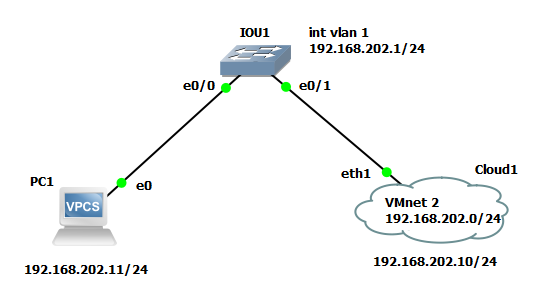

Before running the Python script to automate the configuration of a Cisco switch, there are several pre-configuration steps you need to ensure are in place. These steps are crucial to make sure the script runs smoothly and the switch is ready to accept the configuration changes. Here’s a detailed guide:

**2. Switch Configuration**

In [ ]:
IOU1#configure terminal
IOU1(config)#interface vlan 1
IOU1(config-if)#ip add 192.168.202.1 255.255.255.0
IOU1(config-if)#no shutdown
IOU1(config-if)#exit
IOU1(config)#line vty 0 4
IOU1(config-line)#password cisco
IOU1(config-line)#login
IOU1(config-line)#exit
IOU1(config)#enable password cisco
IOU1(config)#exit
IOU1#write memory
IOU1#show vlan brief

VLAN Name                             Status    Ports
---- -------------------------------- --------- -------------------------------
1    default                          active    Et0/0, Et0/1, Et0/2, Et0/3
                                                Et1/0, Et1/1, Et1/2, Et1/3
                                                Et2/0, Et2/1, Et2/2, Et2/3
                                                Et3/0, Et3/1, Et3/2, Et3/3
1002 fddi-default                     act/unsup
1003 token-ring-default               act/unsup
1004 fddinet-default                  act/unsup
1005 trnet-default                    act/unsup
IOU1#

**3. Network Connectivity**

In [ ]:
PC1> show ip

NAME        : PC1[1]
IP/MASK     : 192.168.202.11/24
GATEWAY     : 192.168.202.1
DNS         :
MAC         : 00:50:79:66:68:00
LPORT       : 20008
RHOST:PORT  : 127.0.0.1:20009
MTU         : 1500

PC1> ping 192.168.202.1

84 bytes from 192.168.202.1 icmp_seq=1 ttl=255 time=0.931 ms
84 bytes from 192.168.202.1 icmp_seq=2 ttl=255 time=0.956 ms
84 bytes from 192.168.202.1 icmp_seq=3 ttl=255 time=1.012 ms

PC1> ping 192.168.202.10

84 bytes from 192.168.202.10 icmp_seq=1 ttl=128 time=1.659 ms
84 bytes from 192.168.202.10 icmp_seq=2 ttl=128 time=1.736 ms
84 bytes from 192.168.202.10 icmp_seq=3 ttl=128 time=1.767 ms
PC1>

**4. Install Required Libraries**
    
Ensure you have Python installed. The telnetlib library is part of Python's standard library, so no additional installation is required.

**5. Write the Python Script**

In [3]:
import telnetlib

# Define the connection parameters
HOST = "192.168.202.1"  # Replace with your switch's IP address
user = "your_username"  # Replace with your username
password = "cisco"  # Replace with your password

# Create a Telnet session
tn = telnetlib.Telnet(HOST)

# Read until the login prompt and enter the username
# tn.read_until(b"Username: ")
# tn.write(user.encode('ascii') + b"\n")

# Read until the password prompt and enter the password
tn.read_until(b"Password: ")
tn.write(password.encode('ascii') + b"\n")

# Enter enable mode
tn.write(b"enable\n")
tn.read_until(b"Password: ")  # If there's an enable password, enter it here
tn.write(password.encode('ascii') + b"\n")

# Enter configuration mode
tn.write(b"configure terminal\n")

# Create VLAN 99
tn.write(b"vlan 99\n")
tn.write(b"name MGMT_VLAN\n")
tn.write(b"exit\n")

# Assign interface e0/0 to VLAN 99
tn.write(b"interface e0/0\n")
tn.write(b"switchport mode access\n")
tn.write(b"switchport access vlan 99\n")
tn.write(b"exit\n")

# Exit configuration mode and save the configuration
tn.write(b"end\n")
tn.write(b"write memory\n")

# Close the Telnet session
tn.write(b"exit\n")
print(tn.read_all().decode('ascii'))
tn.close()


IOU1#configure terminal
Enter configuration commands, one per line.  End with CNTL/Z.
IOU1(config)#vlan 99
IOU1(config-vlan)#name MGMT_VLAN
IOU1(config-vlan)#exit
IOU1(config)#interface e0/0
IOU1(config-if)#switchport mode access
IOU1(config-if)#switchport access vlan 99
IOU1(config-if)#exit
IOU1(config)#end
IOU1#write memory
Building configuration...
Compressed configuration from 1455 bytes to 885 bytes[OK]
IOU1#exit



**6. Verify VLAN Configuration**

In [ ]:
IOU1#show vlan brief

VLAN Name                             Status    Ports
---- -------------------------------- --------- -------------------------------
1    default                          active    Et0/1, Et0/2, Et0/3, Et1/0
                                                Et1/1, Et1/2, Et1/3, Et2/0
                                                Et2/1, Et2/2, Et2/3, Et3/0
                                                Et3/1, Et3/2, Et3/3
99   MGMT_VLAN                        active    Et0/0
1002 fddi-default                     act/unsup
1003 token-ring-default               act/unsup
1004 fddinet-default                  act/unsup
1005 trnet-default                    act/unsup
IOU1#